In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint

In [5]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test' 
data_val_path = 'Fruits_Vegetables/validation'

In [6]:
img_width = 180
img_height = 180

In [7]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False
)

Found 3115 files belonging to 36 classes.


In [8]:
data_category=data_train.class_names

In [9]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False
)

Found 351 files belonging to 36 classes.


In [10]:
data_train_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False
)

Found 359 files belonging to 36 classes.


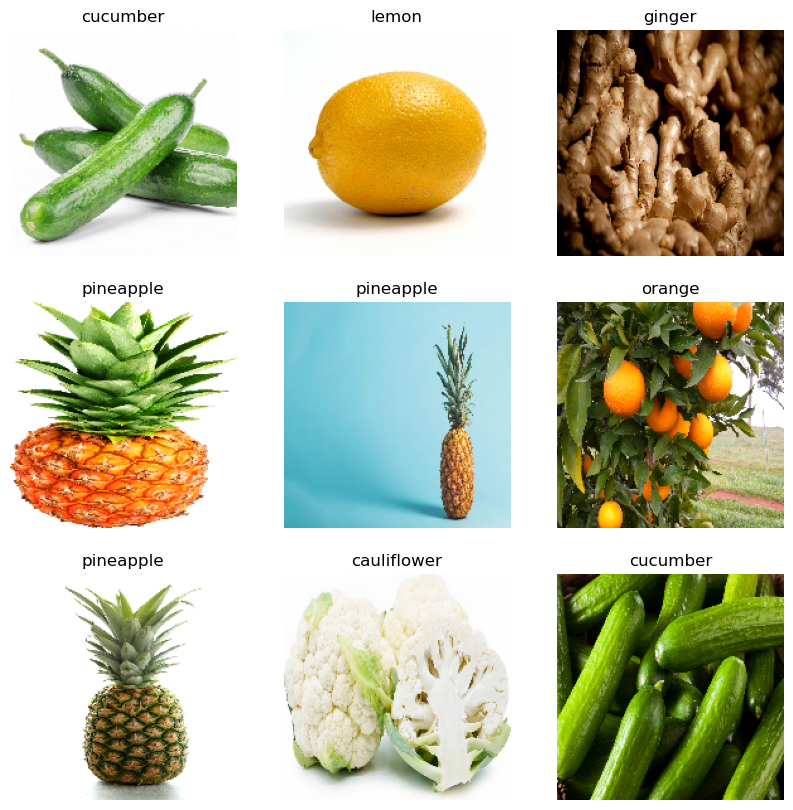

In [11]:
plt.figure(figsize = (10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_category[labels[i]])
        plt.axis('off')

In [12]:
model =  keras.models.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_category))
    
])

In [ ]:
model.compile(optimizer = 'Adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics= ['accuracy'])

In [ ]:
model_path = 'fruit_Veg.keras'
checkpoint=ModelCheckpoint(model_path,monitor='val_accuracy',verbose=1,save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
history = model.fit(
    data_train,
    epochs = 30,
    validation_data = data_val,
    callbacks=callbacks_list
    )

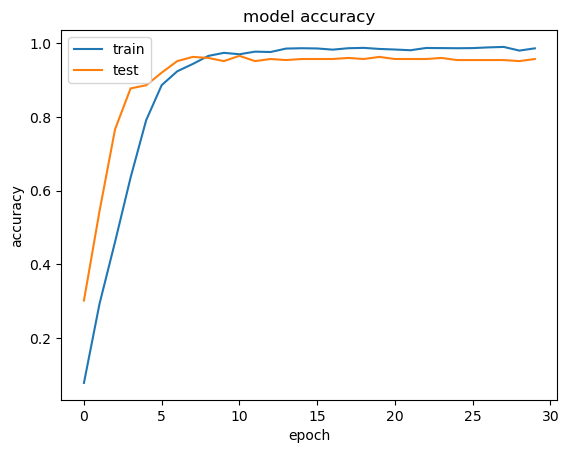

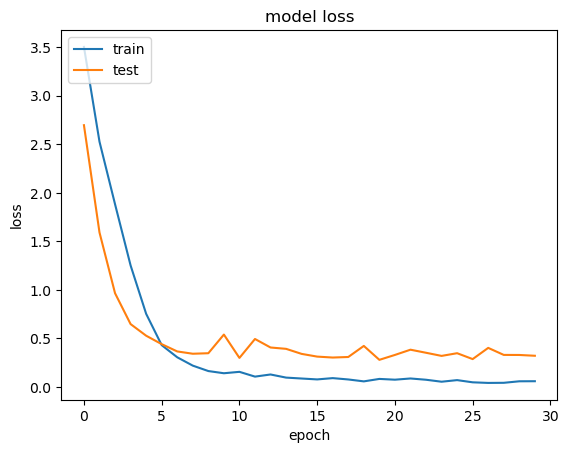

In [15]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [33]:
model.save('Image_classify.keras')

In [30]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [31]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [32]:
score = tf.nn.softmax(predict)

In [33]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_category[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 98.88
